In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/facebook_ads.csv',encoding='ISO-8859-1')

In [ ]:
data.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [ ]:
data.isnull().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

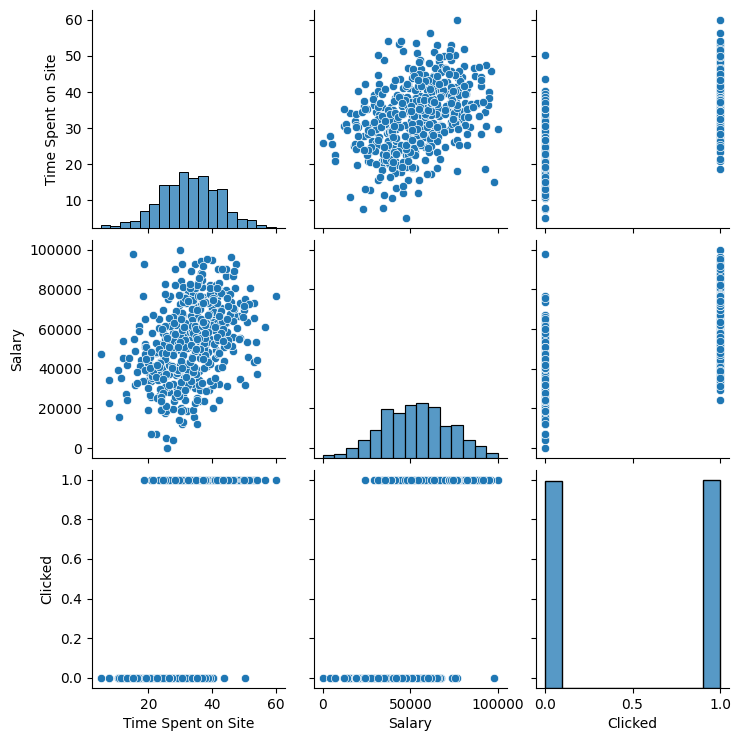

In [ ]:
sns.pairplot(data)

In [ ]:
data.keys()

Index(['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary',
       'Clicked'],
      dtype='object')

In [ ]:
data=data.drop(['Names', 'emails',],axis=1)

In [ ]:
data.Country.value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
Malaysia               1
Name: Country, Length: 210, dtype: int64

In [ ]:
counter=0
for country in data.Country.unique():
  data.Country.replace(country,counter,inplace=True)
  counter+=1

In [ ]:
df = data.copy()
df.head()

,Country,Time Spent on Site,Salary,Clicked
0,0,25.649648,55330.06006,0
1,1,32.456107,79049.07674,1
2,2,20.945978,41098.60826,0
3,3,54.039325,37143.35536,1
4,4,34.249729,37355.11276,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df[['Time Spent on Site','Salary']] = scaler.fit_transform(df[['Time Spent on Site','Salary']])

In [ ]:
x= df.drop('Clicked',axis=1)
y=df['Clicked']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
x_train.shape

(399, 3)

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(15,input_shape=(3,),activation='relu'))
ann.add(Dense(25,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

In [ ]:
ann.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 15)                60        
                                                                 
 dense_60 (Dense)            (None, 25)                400       
                                                                 
 dense_61 (Dense)            (None, 1)                 26        
                                                                 
Total params: 486
Trainable params: 486
Non-trainable params: 0
_________________________________________________________________


In [ ]:

ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist=ann.fit(x_train, y_train, epochs=200,validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 1s 24ms/step - loss: 5.9481 - accuracy: 0.4890 - val_loss: 3.1200 - val_accuracy: 0.6125
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 2.4640 - accuracy: 0.4859 - val_loss: 0.6842 - val_accuracy: 0.6125
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 1.0604 - accuracy: 0.4608 - val_loss: 1.6565 - val_accuracy: 0.3875
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.9132 - accuracy: 0.5266 - val_loss: 0.6582 - val_accuracy: 0.6125
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.7617 - accuracy: 0.4796 - val_loss: 0.6564 - val_accuracy: 0.6125
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.7140 - accuracy: 0.4890 - val_loss: 0.7985 - val_accuracy: 0.3875
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 0.7031 - accuracy: 0.5361 - val_loss: 0.6572 - val_accuracy: 0.6125
Epoch 8/200


In [ ]:
ann.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.3247 - accuracy: 0.8800


[0.32467082142829895, 0.8799999952316284]

In [ ]:

yp = ann.predict(x_test)
yp[:5]

4/4 [==============================] - 0s 2ms/step


array([[0.02918826],
       [0.05337536],
       [0.9847559 ],
       [0.0373975 ],
       [0.86253154]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5: # becasue it's sigmoid
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        56
           1       0.85      0.89      0.87        44

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



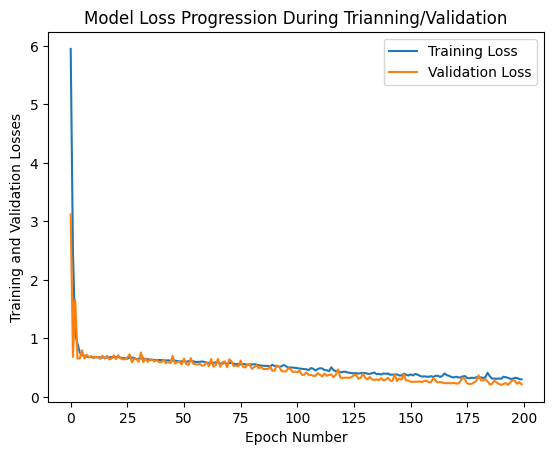

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model Loss Progression During Trianning/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])